In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,3,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,12.247694
1,1,2,20,3,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,12.109011
2,2,3,60,3,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,12.317167
3,3,4,70,3,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,11.849398
4,4,5,60,3,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,12.429216


In [13]:
train = train.drop(["Unnamed: 0", "Id"], axis = 1)
test = test.drop(["Unnamed: 0", "Id"], axis = 1)
train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,12.247694
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,12.109011
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,12.317167
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,11.849398
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,12.429216


In [3]:
train_data = train.values
Y = train_data[:, - 1 ].reshape(train_data.shape[ 0 ], 1 )
X = train_data[:, :- 1 ]

test_data = test.values
Y_test = test_data[:, - 1 ].reshape(test_data.shape[ 0 ], 1 )
X_test = test_data[:, :- 1 ]

In [4]:
print ( "Shape of X_train :" , X.shape)
print ( "Shape of Y_train :" , Y.shape)
print ( "Shape of X_test :" , X_test.shape)
print ( "Shape of Y_test :" , Y_test.shape)

Shape of X_train : (1200, 69)
Shape of Y_train : (1200, 1)
Shape of X_test : (258, 69)
Shape of Y_test : (258, 1)


In [6]:
X = np.vstack((np.ones((X.shape[ 0 ], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[ 0 ], )), X_test.T)).T

In [8]:
def model(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np .zeros((X.shape[ 1 ], 1 ))
    cost_list = []
    for i in range (iteration):
        y_pred = np .dot(X, theta)
        cost = ( 1 /( 2 *m))* np . sum ( np .square(y_pred - Y))
        d_theta = ( 1 /m)* np .dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list. append (cost)
        # to print the cost for 10 times
        if (i%(iteration/ 10 ) == 0 ):
            print ( "Cost is :" , cost)
    return theta, cost_list

In [9]:
iteration = 10000
learning_rate = 0.000000005
theta, cost_list = model(X, Y, learning_rate = learning_rate, iteration =
iteration)

Cost is : 72.37539364066856
Cost is : 0.02790416831031688
Cost is : 0.017251065372144186
Cost is : 0.016355272705548235
Cost is : 0.016158836087530763
Cost is : 0.01604095849845064
Cost is : 0.015946827323753417
Cost is : 0.015867896317230127
Cost is : 0.015800568014785396
Cost is : 0.0157423553064829


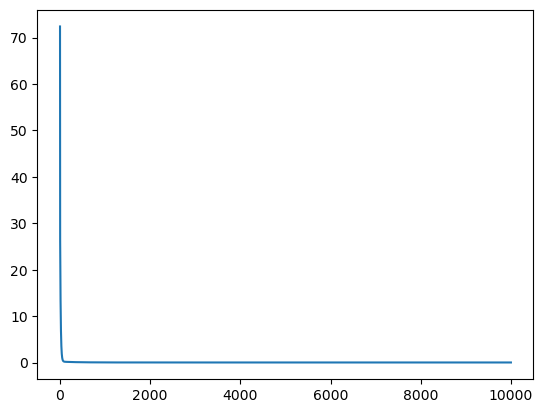

In [10]:
rng = np.arange( 0 , iteration)
plt. plot (rng, cost_list)
plt. show ()

In [11]:
y_pred = np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))
print ( "Test error is :" , error *100 , "%" )
print ( "Test Accuracy is :" , (1- error) *100 , "%" )

Test error is : 12.957658795431676 %
Test Accuracy is : 87.04234120456833 %
